## Fine Clustering Supp Figure

Show fine-grained clusters used for peak clustering.

In [7]:
library(ggplot2)
library(scattermore)
library(RColorBrewer)

In [3]:
DAYS = c("D0", "D2", "D4", "D6", "D8", "D10", "D12", "D14", "iPSC")

In [4]:
# Metadata file from previous run
metaData = read.table("../../analysis/20200206_pmat_snapATAC/sessions/20210717_n62599/metadata.tsv", header = T)
rownames(metaData) = paste(metaData$sample, metaData$barcode, sep='_')
metaData$sample = factor(metaData$sample, levels=DAYS)
dim(metaData)
head(metaData, 5)

[1] 62599     5

,barcode,sample,umap1,umap2,cluster
,<fct>,<fct>,<dbl>,<dbl>,<int>
D0_AAACACGCTAGTACGG,AAACACGCTAGTACGG,D0,-1.8037916,-9.507773,1
D0_AAACACGCTCTTCAAG,AAACACGCTCTTCAAG,D0,0.7074551,-9.406457,1
D0_AAACACGCTGATCCAT,AAACACGCTGATCCAT,D0,-2.9559933,-7.641148,1
D0_AAACCCTGACCGCTAG,AAACCCTGACCGCTAG,D0,-3.6119107,-8.443144,1
D0_AAACCCTGATTGCAGT,AAACCCTGATTGCAGT,D0,0.5002119,-8.759449,3


In [9]:
# load fine clusters from file
fine_clusters = read.table("../../analysis/20200206_pmat_snapATAC/sessions/20210717_n62599/fine_clusters.tsv", 
            header = T)
all(fine_clusters$sample_barcode==rownames(metaData))

clusters = fine_clusters$clusters
head(fine_clusters)

[1] TRUE

,sample_barcode,clusters
,<fct>,<int>
1,D0_AAACACGCTAGTACGG,36
2,D0_AAACACGCTCTTCAAG,7
3,D0_AAACACGCTGATCCAT,37
4,D0_AAACCCTGACCGCTAG,41
5,D0_AAACCCTGATTGCAGT,15
6,D0_AAACCGTACACACCTA,36


In [8]:
qual_col_pals = brewer.pal.info[brewer.pal.info$category == 'qual',]
col_vector = unlist(mapply(brewer.pal, qual_col_pals$maxcolors, rownames(qual_col_pals)))

## Plotting

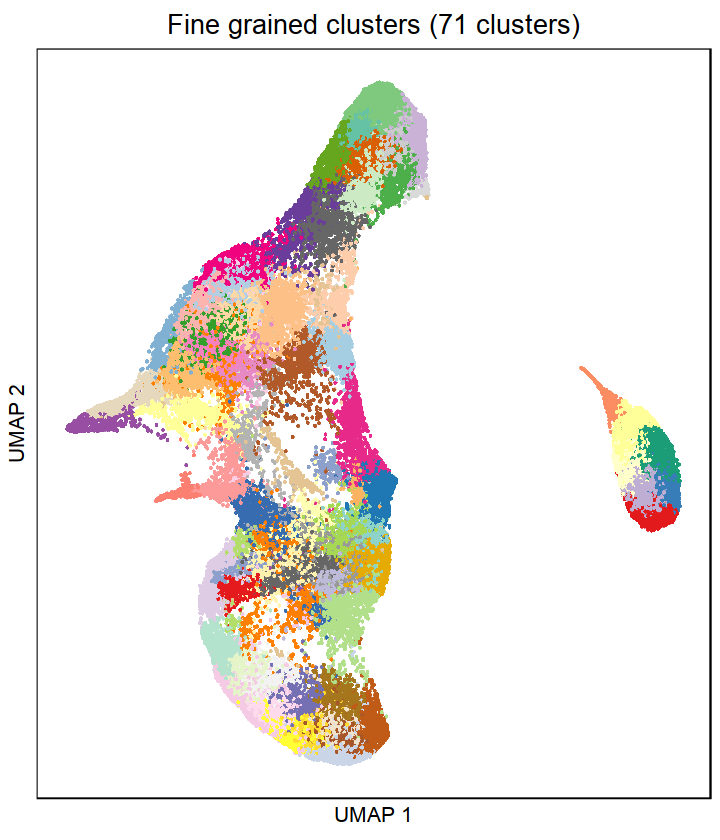

In [25]:
options(repr.plot.width = 6, repr.plot.height = 7)

df = data.frame(umap1=metaData$umap1, 
                umap2=metaData$umap2,
                clst=as.factor(clusters))
# shuffle so days don't overlap
df = df[sample(dim(df)[1]), ]

p = ggplot(df) +
# ggplot(df[df$x.sp.sample %in% c("D14"), ]) +
geom_scattermore(pointsize=8, aes(x=umap1 , y=umap2, col=clst), pixels=c(3000,3000)) +
# geom_point(size=0.2, alpha=1, aes(x=umap1 , y=umap2, col=clst)) +
# scale_color_brewer( palette = "Set1") +
scale_color_manual(values=col_vector) +
# geom_text(data=data.frame(aggregate(metaData[,c("umap1","umap2")], 
#                                     list(clusters), mean)),
#          aes(x=umap1, y=umap2, label=Group.1), fontface = "bold") +
ggtitle("Fine grained clusters (71 clusters)") +
theme_classic() +
            xlab("UMAP 1") + ylab("UMAP 2") +
            theme(plot.title = element_text(hjust = 0.5, size=16),
                  text = element_text(size=12),
                  axis.line=element_blank(),
                  axis.text.x=element_blank(),
                  axis.text.y=element_blank(),
                  axis.ticks=element_blank(),
                  legend.position="none",
                  legend.justification="right",
                  panel.border = element_rect(colour = "black", fill=NA, size=0.5)) +
            coord_fixed()   

p

In [26]:
ggsave(p, file="./subfigs/supp_fine_grained.pdf", width=6, height=7)

---

In [11]:
sessionInfo()

R version 3.6.3 (2020-02-29)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 18.04.6 LTS

Matrix products: default
BLAS/LAPACK: /users/surag/anaconda3/envs/r36_cran/lib/libopenblasp-r0.3.9.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] RColorBrewer_1.1-2 scattermore_0.7    ggplot2_3.3.3     

loaded via a namespace (and not attached):
 [1] magrittr_1.5      tidyselect_1.1.0  munsell_0.5.0     uuid_0.1-4       
 [5] colorspace_1.4-1  R6_2.4.1          rlang_0.4.11      dplyr_1.0.2      
 [9] tools_3.6.3       grid_3.6.3       